# Safestay: Hostels and Hotels

## Introduction

### Mock Performnace Analysis and Solutions

This report presents a comprehensive mock performance analysis designed to identify key pain points hindering the growth of the business. The data used in this analysis has been generated based on realistic, near real-world scenarios, with a focus on Safestay’s business operations.

The primary objective of this analysis is to demonstrate my ability to understand business challenges through a data-driven approach. As a data analyst, I analyze data to identify key problem areas and present actionable insights to decision-makers to support informed business improvements.


By

**Dudekula Abid Hussain**

Email - dudekula.abid.hussain@outlook.com

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Data Set (This data set is randomly generated)
filepath = '/kaggle/input/safestay-hostels-and-hotels-mock-data-set/safestay_performance_2022_2025.csv'

df = pd.read_csv(filepath)

df.head()

,Date,Hostel Name,City,Country,Avg Bed Price (£),Occupancy
0,2022-01-01,Brussels Grand Place,Brussels,Belgium,26.40,129
1,2022-01-01,Prague Charles Bridge,Prague,Czech Republic,36.22,128
2,2022-01-01,Berlin Kurfürstendamm,Berlin,Germany,31.99,164
3,2022-01-01,Athens Monastiraki,Athens,Greece,35.47,125
4,2022-01-01,Pisa Centrale,Pisa,Italy,35.42,117


In [3]:
df.shape

(22986, 6)

Great, We have 22k data points, that represents data of all 18 locations of safestay across europe, with each location on each day - That's a good data to analyze. Now, let's have a look for the missing values and clean them for our Exploratory Data Analysis (EDA).

In [4]:
df.isnull().sum()

Date                 0
Hostel Name          0
City                 0
Country              0
Avg Bed Price (£)    0
Occupancy            0
dtype: int64

Grwat we don't have any missing values, and the data looks pretty clean. This typw of data comes under time series dat types, for ML. But, for now as we are just focising on the analysis part and not on the modelling part, we will be analyzing the data thoroughly to find the trends and the insights. 

## Exploratory Data Analysis (EDA)

In [5]:
# For EDA let's start with statistical summary of numeric variables
# Statistical Summary

df.describe()

,Avg Bed Price (£),Occupancy
count,22986.000000,22986.000000
mean,33.705302,117.883190
std,5.868113,23.694913
min,15.380000,50.000000
25%,29.490000,101.000000
50%,33.670000,117.000000
75%,37.940000,135.000000
max,53.120000,164.000000


## Data Visualization

In [6]:
#Occupancy vs Location

#Group by 'Location' and calculate average and total occupancy
occupancy_by_location = df.groupby('Hostel Name')['Occupancy'].agg(['mean', 'sum', 'count']).reset_index()

#Rename columns for clarity
occupancy_by_location.columns = ['Hostel_Name', 'Average_Occupancy', 'Total_Occupancy', 'Number_of_Entries']

#Sort by avg occupancy
occupancy_by_location = occupancy_by_location.sort_values(by = 'Average_Occupancy', ascending = False)

#Display result
occupancy_by_location

,Hostel_Name,Average_Occupancy,Total_Occupancy,Number_of_Entries
14,Pisa Centrale,118.985121,151944,1277
3,Berlin Kurfürstendamm,118.967894,151922,1277
2,Barcelona Passeig de Gracia,118.876273,151805,1277
6,"Calpe Seafront, Costa Blanca",118.558340,151399,1277
11,London Elephant & Castle,118.245106,150999,1277
12,London Kensington Holland Park,118.155051,150884,1277
13,Madrid Central,118.054033,150755,1277
8,Edinburgh Cowgate,117.875489,150527,1277
7,Córdoba Mezquita Catedral,117.790133,150418,1277
5,Brussels Grand Place,117.612373,150191,1277


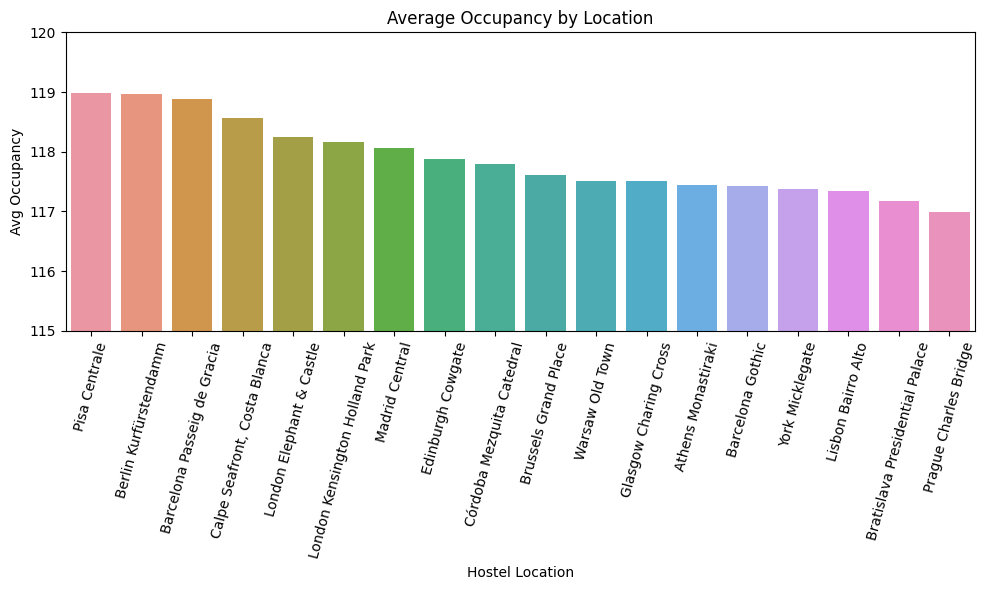

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.barplot(data = occupancy_by_location, x = 'Hostel_Name', y = 'Average_Occupancy')
plt.xticks(rotation = 75)
plt.title('Average Occupancy by Location')
plt.ylabel('Avg Occupancy')
plt.xlabel('Hostel Location')

#zoom in on y-axis range to see samll deviations clearly
plt.ylim(115, 120)

plt.tight_layout()
plt.show()

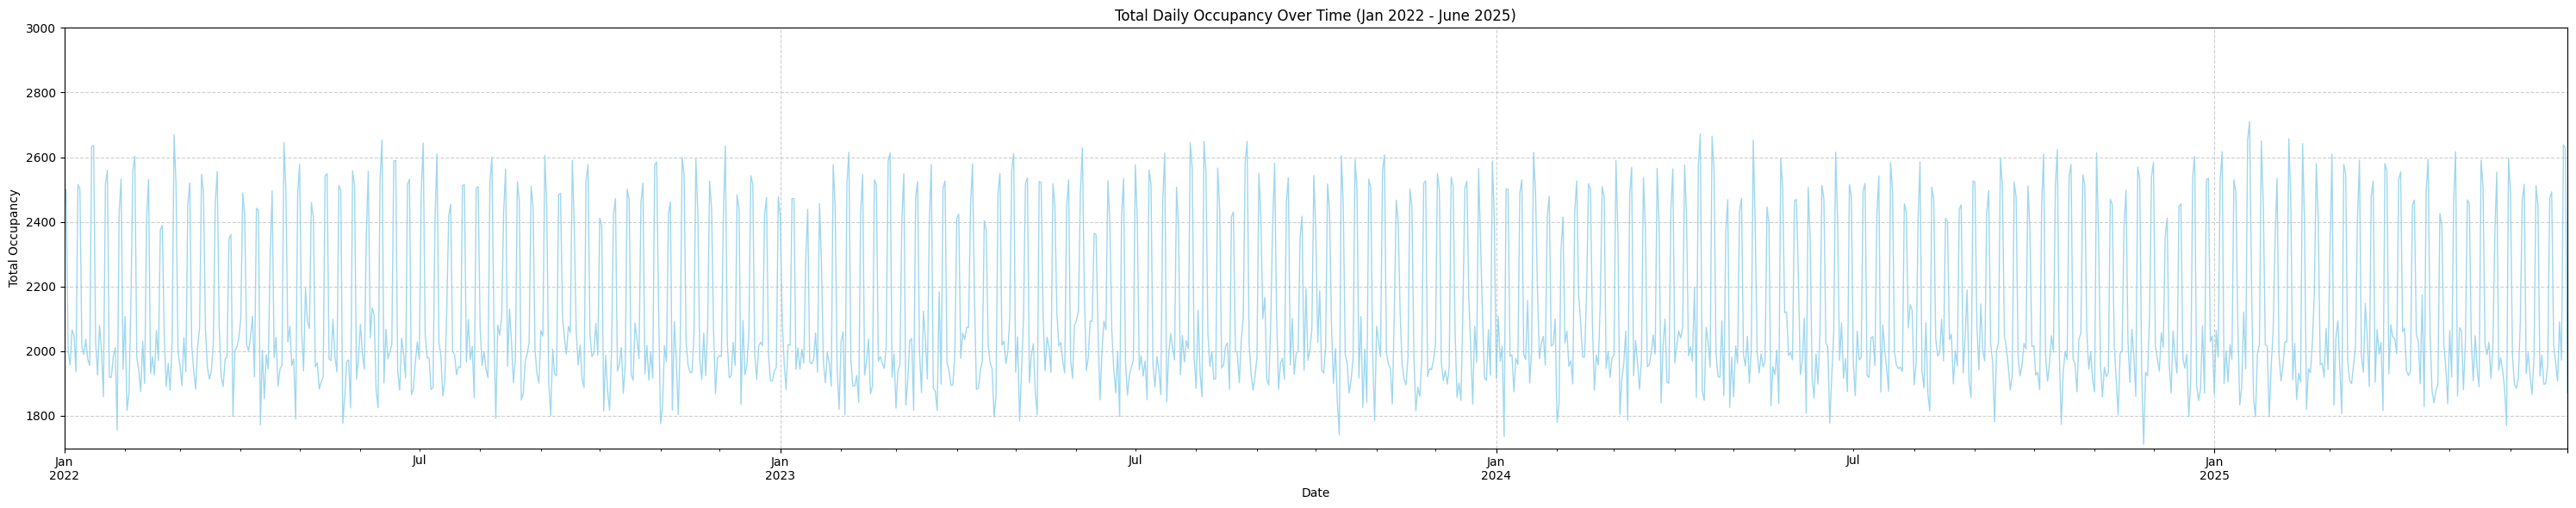

In [8]:
#plot between day vs occupancy

""" 
this helps to analyze if the occupacy are increasing or decreasing over time,
Before that we need to make sure that the date column is in date and time format
this is crucial for time series types, so let's convert the date column into date and time
""" 
df['Date'] = pd.to_datetime(df['Date'])

#sort data for correct line plot rendering
df = df.sort_values(by = 'Date')

#Aggriating total no of occupancy across all hostels
#By doing this we are creating a series with index as the date and values are the total occupacy for that day
daily_total_occupancy = df.groupby('Date')['Occupancy'].sum()

plt.figure(figsize=(30, 6))
daily_total_occupancy.plot(kind = 'line', color = 'skyblue', linewidth = 1, alpha = 0.8)
plt.title('Total Daily Occupancy Over Time (Jan 2022 - June 2025)')
plt.xlabel('Date')
plt.ylabel('Total Occupancy')
plt.grid(True, linestyle = '--', alpha = 0.6)

plt.ylim(1700, 3000)

plt.tight_layout()
plt.show()

In [9]:
import plotly.express as px

#Group the data by Hostel Name and Calculate the Avg bed price
avg_price_per_hostel = df.groupby('Hostel Name')['Avg Bed Price (£)']. mean().reset_index()

#Pie cahrt using Plotly
fig = px.pie(
    avg_price_per_hostel,
    names = 'Hostel Name',
    values = 'Avg Bed Price (£)',
    title = 'Avg Bed Price Distribution by Hostel',
    color_discrete_sequence = px.colors.sequential.RdPu #pink theme pallete
)

#Improving label display
fig.update_traces(textinfo = 'percent+label', textposition = 'inside')

fig.show()

Let's limit the analysis data from January 1st 2025 till 30th June 2025

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

df_2025 = df[(df['Date'] >= '2025-01-01') & (df['Date'] <= '2025-06-30')]

In [11]:
avg_occupancy = df_2025.groupby('Hostel Name')['Occupancy'].mean().reset_index()

In [12]:
fig = px.bar(
    avg_occupancy,
    x = 'Hostel Name',
    y = 'Occupancy',
    title = 'Avg Occupancy per Hostel (Jan-June 2025)',
    text_auto = True,
    color = 'Occupancy',
    color_continuous_scale = 'Tealrose'
)

fig.update_layout(
    yaxis=dict(range=[110, 123]),
    xaxis_tickangle=45,
    yaxis_title="Avg Occupancy",
    xaxis_title="Hostel Name"
)
fig.show()

In [13]:
#line plot over time

# Group by Date and calculate average occupancy per day
occupancy_trend = df_2025.groupby('Date')['Occupancy'].mean().reset_index()

# Plot using Plotly
fig = px.line(
    occupancy_trend,
    x='Date',
    y='Occupancy',
    title='Average Daily Occupancy (Jan–June 2025)',
    markers=True
)

fig.update_layout(
    width=1000,   
    height=600  
)

fig.show()

In [14]:
avg_price_per_hostel = df_2025.groupby('Hostel Name')['Avg Bed Price (£)'].mean().reset_index()


fig = px.pie(
    avg_price_per_hostel,
    names='Hostel Name',
    values='Avg Bed Price (£)',
    title='Average Bed Price Per Night by Hostel',
    template='plotly_dark',
    hole=0.3 
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600, width=800)
fig.show()


In [15]:
# Total occupancy changed over time month by month
# Extract the month (as first day of each month)
df_2025['Month'] = df_2025['Date'].dt.to_period('M').dt.to_timestamp()

# Group by month and sum occupancy
monthly_occupancy = df_2025.groupby('Month')['Occupancy'].sum().reset_index()


In [16]:
fig = px.line(
    monthly_occupancy,
    x='Month',
    y='Occupancy',
    markers=True,
    title='Total Occupancy Across All Hostels (Jan 2025 - Jun 2025)',
    template='plotly_white'
)

fig.update_traces(line_color='teal')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Occupancy',
    height=500,
    width=900
)

fig.show()


In [17]:
# Analysis of York branch (As it have less occupancy)

# Filter for the specific hostel and time period
york_df = df_2025[(df['Hostel Name'] == 'York Micklegate')].copy()

# Convert Date to datetime and extract Month
york_df['Date'] = pd.to_datetime(york_df['Date'])
york_df['Month'] = york_df['Date'].dt.to_period('M').dt.to_timestamp()

# Group by month to get avg bed price and avg occupancy
york_monthly = york_df.groupby('Month').agg({
    'Occupancy': 'mean',
    'Avg Bed Price (£)': 'mean'
}).reset_index()


In [18]:
# Plot avg bed price and occupancy using Plotly (dual y-axis)
import plotly.graph_objects as go

fig = go.Figure()

# Line for Occupancy
fig.add_trace(go.Scatter(
    x=york_monthly['Month'],
    y=york_monthly['Occupancy'],
    name='Occupancy',
    yaxis='y1',
    mode='lines+markers',
    line=dict(color='crimson')
))

# Line for Avg Bed Price
fig.add_trace(go.Scatter(
    x=york_monthly['Month'],
    y=york_monthly['Avg Bed Price (£)'],
    name='Avg Bed Price (£)',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='darkblue')
))

# Layout adjustments
fig.update_layout(
    title='York Micklegate: Occupancy vs. Avg Bed Price (Jan–Jun 2025)',
    xaxis=dict(title='Month'),
    yaxis=dict(
        title='Occupancy',
        titlefont=dict(color='crimson'),
        tickfont=dict(color='crimson')
    ),
    yaxis2=dict(
        title='Avg Bed Price (£)',
        titlefont=dict(color='darkblue'),
        tickfont=dict(color='darkblue'),
        anchor='x',
        overlaying='y',
        side='right'
    ),
    height=500,
    width=950,
    template='plotly_white'
)

fig.show()


# Conclusion & Results

As we conclude this analysis, let’s revisit the key insights gathered and outline what steps Safestay can consider moving forward.

> Note: The data used in this project is synthetic—it was generated based on Safestay’s business model to simulate a real-world scenario and offer a hands-on analytical experience.
> 

### Key Observations:

- **Strong Performance**: The company maintained an impressive **~90% average occupancy** throughout the period from **January 2022 to June 2025**, indicating consistent customer demand and operational efficiency.
- **Pricing Consistency**: One critical observation is that **average bed prices remain nearly identical** across all 18 branches, with minimal variation. While this simplifies pricing strategy, it **doesn’t account for local market dynamics, seasonal events, or customer expectations**—presenting an opportunity for **1–2% improvement** in both occupancy and revenue by adopting **location-specific dynamic pricing**.
- **York Branch Underperformance**: The **York Micklegate** location showed a **slight but consistent decline in occupancy** compared to other branches. A deeper analysis revealed an **inverse relationship between price and occupancy**, indicating this branch is **highly price-sensitive**. Strategic adjustments in pricing based on local demand could significantly improve performance here.

### Next Steps:

While this project focused on two primary KPIs—**Occupancy** and **Average Bed Price per Night**, further insights could be gained by analyzing additional performance indicators such as:

- **Guest Reviews & Ratings**
- **MPI (Market Penetration Index)**
- **RevPAR (Revenue Per Available Room)**
- **ReRTI (Revenue per Room Type Index)**

These metrics, combined with customer sentiment and operational factors, would offer a **more comprehensive view of business health** and identify additional areas for optimization.

### Final Thoughts:

Even with synthetic data, this case study demonstrates the **critical role a data analyst plays** in identifying patterns, uncovering inefficiencies, and **providing data-backed recommendations** for improvement.

Safestay is already performing well, but with focused refinements in **pricing strategy, localized analysis, and deeper KPI exploration**, the company can enhance guest satisfaction and drive greater profitability—**turning data into decisions that truly make a difference**.